<a href="https://colab.research.google.com/github/iamchenchu/Deep-Learnig-with-TensorFlow/blob/main/05_transfer_learning_in_tensorflow_part1_feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning with TensorFlow Part 1 : Feature Extraction

Transfer Learning is leveraging a working model's existing architecture and learned patterns for our own problem.
**There are two main benefits :**

1. Can leverage an existing neural network architechture proven to work on probelms similar to our own.
2. Can leverage a working neural network architecture which has already learned patterns on similar data to our own, then we can adapt those patterns to our own data.


In [ ]:
# Are we using a GPU

!nvidia-smi

Tue Dec 19 17:06:21 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0              41W / 300W |    820MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Downloading and becoming one with the data


In [ ]:
# Get data (10% of 10 food classes from food101)

import zipfile

#download the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

#unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()


--2023-12-19 17:06:22--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.18.207, 142.250.145.207, 74.125.128.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.18.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M  35.4MB/s    in 4.5s    

2023-12-19 17:06:26 (35.6 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [ ]:
# How many images in each folder ?
import os

#walk through 10 percent data directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/c

# Creating data loaders (Preparing the data)

We'll use the ImageDataGenerator class to load in our images in batches.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                                          target_size = IMAGE_SHAPE,
                                                          batch_size = BATCH_SIZE,
                                                          class_mode = "categorical")
print("Testing images :")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = IMAGE_SHAPE,
                                             batch_size = BATCH_SIZE,
                                             class_mode = "categorical")



Training images
Found 750 images belonging to 10 classes.
Testing images :
Found 2500 images belonging to 10 classes.


# Setting up callbacks (things to run whilst our model trains)

Callbacks are extra functionality you can ass to your models to be performed during  or after training. Some of the the most popular callbacks :

Call backs are a tool whichh can add helpful functionality to your models during training evaluation or interference

* Tracking experiments with the TensorBoard Callback
* Model checkpoint with the modelCheckpoint callback
* Stopping a model from training (Before it trains too long and overfit) with the earlyStopping callback.





In [ ]:
# Create TensorBoard callback (functionized because we need to create a new one for each model)

import datetime

def create_tensoreboard_callback(dir_name, experiment_name) :
  log_dir = dir_name + "/ " + experiment_name + "_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)
  print(f"Saving TensorBoard log files to : {log_dir}")
  return tensorboard_callback



**Note :** You can customize the directory where your TensorBoard logs (model training metrics) get saved to whatever you like. The log_dir parameter we've created above is only one option.

# Creating models using the tensorflow Hub

In the past we've used TensorFlow to create our own models layer by layer from the scratch.

Now we're going to do a similar process, except one majority of your models layers are going to come from TensorFlow Hub.

We can access pretrained models on : https://tfhub.dev/

Browsing the tensorflow hub page and sorting for image classification , we found the following feature vector model link:
https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1


**TensorFLow Hub :** A place to find a plethora of pre-trained machine learning models( Ready to be applied and fine-tuned for your own problems)






In [ ]:

# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"

# # New: EfficientNetB0 feature vector (version 2)
# efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"

In [ ]:
#Import dependencies

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers


In [ ]:
def create_model(model_url, num_classes = 10):
  """ Takes a TensorFlow Hub URL and creates a keras Sequential model with it.
Args : model_url(str): A TensorFlow Hub feature extraction URL.
num_classes(int): The number of output neurons in the output layer, should be equal to the number of target classes, default 10
Returns: An uncompiled keras Sequential model with model_url as a feature extractor layer and a dense output layer with num_classes output neurons.
"""

  # Download the pre-trained model and save it as a Keras layer.
  feature_extractor_layer = hub.KerasLayer(model_url,
                                         trainable = False,
                                         name = "feature_extractor_layer",
                                         input_shape = IMAGE_SHAPE+(3,))
  #Create our sequential model
  model = tf.keras.Sequential([
      feature_extractor_layer,
      layers.Dense(num_classes, activation = "softmax", name ="output_layer")
  ])
  print("Model created successfully")
  print("Model summary:")

  return model

# Creating and testing ReseNet TensorFLow Hub



In [ ]:
resnet_model = create_model(resnet_url,
                            num_classes=train_data_10_percent.num_classes)

Model created successfully
Model summary:


In [ ]:
resnet_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extractor_layer (K  (None, 2048)              23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23585290 (89.97 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [ ]:
#Compile our resnet model

resnet_model.compile(loss = "categorical_crossentropy",
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics = ["accuracy"])


In [ ]:
#Fit the model Let's fit our model to the data (10 percent of 10 )

resnet_history = resnet_model.fit(train_data_10_percent,
                                  epochs =5,
                                  steps_per_epoch = len(train_data_10_percent),
                                  validation_data = test_data,
                                  validation_steps = len(test_data),
                                  callbacks =[create_tensoreboard_callback(dir_name="tensorflow_hub",
                                                                           experiment_name = "resonet50V2")])

Saving TensorBoard log files to : tensorflow_hub/ resonet50V2_20231219-180528
Epoch 1/5
24/24 [==============================] - 9s 383ms/step - loss: 0.0805 - accuracy: 0.9973 - val_loss: 0.6178 - val_accuracy: 0.7976
Epoch 2/5
24/24 [==============================] - 9s 403ms/step - loss: 0.0729 - accuracy: 0.9987 - val_loss: 0.6142 - val_accuracy: 0.7984
Epoch 3/5
24/24 [==============================] - 10s 413ms/step - loss: 0.0658 - accuracy: 0.9987 - val_loss: 0.6182 - val_accuracy: 0.7968
Epoch 4/5
24/24 [==============================] - 9s 390ms/step - loss: 0.0603 - accuracy: 1.0000 - val_loss: 0.6168 - val_accuracy: 0.7944
Epoch 5/5
24/24 [==============================] - 9s 375ms/step - loss: 0.0557 - accuracy: 1.0000 - val_loss: 0.6174 - val_accuracy: 0.7984


Wow!!
That is incredible as compare to the other models we built in the last series.Our transfer learning feature extractor model model

In [ ]:
#let's create a function to plot our loss curves
# Tidbit : you could put a function like this into a script called "Helper.py" and improve

import matplotlib.pyplot as plt

def plot_loss_curves(history):
  """Returns separate loss curves for training and validation metrics.
  Args: history : tensorflow History object

  Returns : Plots of training/validation loss and accuracy metrics """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

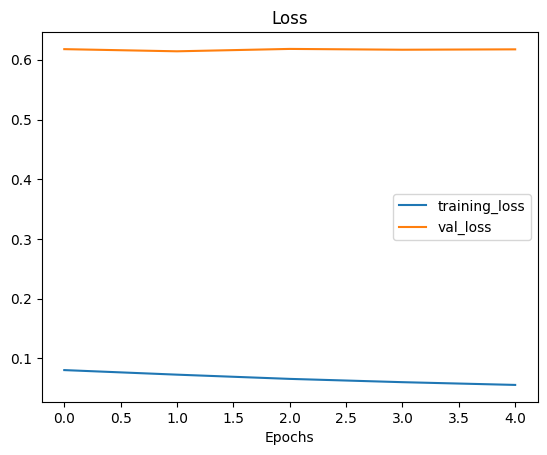

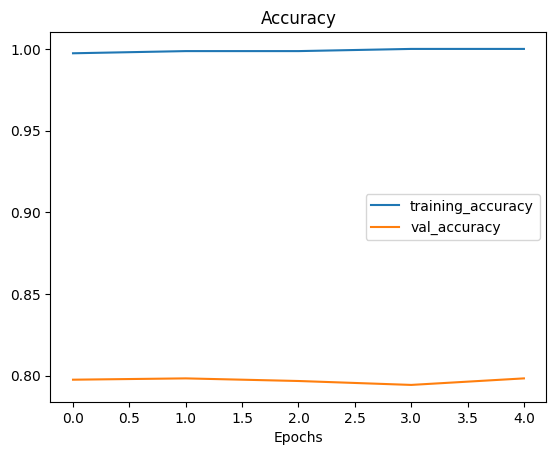

In [ ]:
plot_loss_curves(resnet_history)

# Creating and testing EfficiantNetB0 TensorFlow Hub Feature Extraction model



In [ ]:
# Create efficientNet model for feature extractor model

efficientnet_model = create_model(model_url = efficientnet_url,
                                  num_classes = train_data_10_percent.num_classes)

#Compile efficientNet model
efficientnet_model.compile(loss = "categorical_crossentropy",
                           optimizer = tf.keras.optimizers.Adam(),
                           metrics = ["accuracy"])

#Fir the model to the 10% of the training data
efficientnet_history = efficientnet_model.fit(train_data_10_percent,
                                              epochs = 5,
                                              steps_per_epoch = len(train_data_10_percent),
                                              validation_data = test_data,
                                              validation_steps = len(test_data),
                                              callbacks = [create_tensoreboard_callback(dir_name = "tensorflow_hub",
                                                                                        experiment_name ="efficientnetb0")])

Model created successfully
Model summary:
Saving TensorBoard log files to : tensorflow_hub/ efficientnetb0_20231219-183844
Epoch 1/5
24/24 [==============================] - 19s 452ms/step - loss: 1.8717 - accuracy: 0.4067 - val_loss: 1.4420 - val_accuracy: 0.6416
Epoch 2/5
24/24 [==============================] - 9s 370ms/step - loss: 1.2532 - accuracy: 0.7067 - val_loss: 1.0863 - val_accuracy: 0.7200
Epoch 3/5
24/24 [==============================] - 8s 358ms/step - loss: 0.9823 - accuracy: 0.7587 - val_loss: 0.9259 - val_accuracy: 0.7436
Epoch 4/5
24/24 [==============================] - 8s 362ms/step - loss: 0.8263 - accuracy: 0.7960 - val_loss: 0.8427 - val_accuracy: 0.7588
Epoch 5/5
24/24 [==============================] - 8s 362ms/step - loss: 0.7223 - accuracy: 0.8267 - val_loss: 0.7886 - val_accuracy: 0.7696


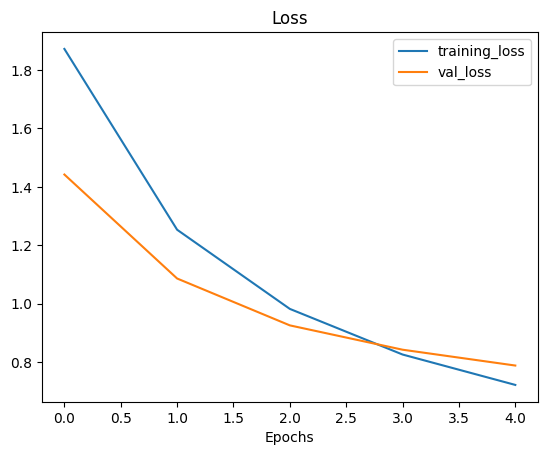

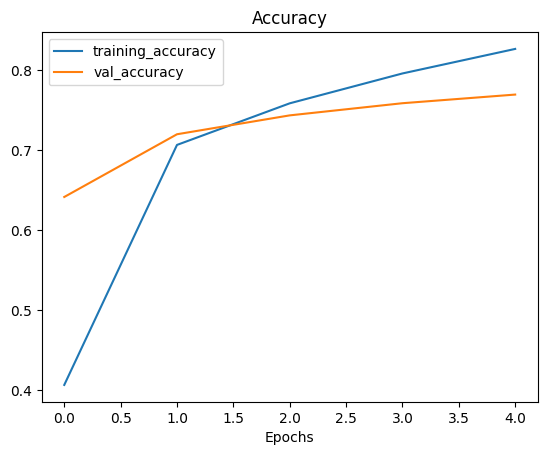

In [ ]:
plot_loss_curves(efficientnet_history)

In [ ]:
efficientnet_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extractor_layer (K  (None, 1280)              5919312   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 5919312 (22.58 MB)
_________________________________________________________________


In [ ]:
resnet_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extractor_layer (K  (None, 2048)              23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23585290 (89.97 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [ ]:
efficientnet_model.layers[0].weights[0].shape

TensorShape([3, 3, 32, 16])

# Different types of Transfer learning

* **"As is" transfer learning** - using an existing model with no changes what so ever (E.g using ImageNet model on 1000 ImageNet classes, none of your own)
* **"Feature Extraction" transfer learning** - use the pre learned patterns of an existing model(Eg : efificientNetB0 trained on ImageNet) and adjust the output layer for your own probelem (Eg : 1000 classes -> 10 classes of food)
* **"Fine Tuning" transfer learning** - use the prelearned patterns of an existing model and "fine tune" manu or all of the underlying layers (including new output layers)





# Comparing the results of our models using the TensorBoard

> Note : When you unload the things to TensorBoard.dev, your experiments are will be in public. So if you are running private experiments(things you don't want others to see) do not upload them to TensorBoard.dev

In [ ]:
#Upload TensorBoeard dev records

!tensorboard dev upload --logdir ./logdir ./tensorflow_hub/ \
  --name "EfficientNetB0 vs ResNet50V2" \
  --description "Comparing two different TF Hub feature extraction architectures using 10% of the training data" \
  --one_shot


2023-12-19 19:06:34.683775: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-19 19:06:34.683823: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-19 19:06:34.685204: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-19 19:06:35.776841: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
usage: tensorboard [-h] [--helpfull] {serve,dev} ...
tensorboard: error: unrecognized arguments: ./tensorflow_hub/
